# **Completed by: Fatima Malikli and Jiyeon Lyu**

In [340]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time 


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def reluForward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def reluCostFunctionPrime(self, X, y):
        self.yHat = self.reluForward(X)
        delta3 = np.multiply(-(y-self.yHat), self.reluPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        delta2 = np.dot(delta3, self.W2.T)*self.reluPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1, dJdW2
    
    def reluCostFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.reluForward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    

In [341]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [342]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [343]:
y

array([[75.],
       [80.],
       [93.]])

In [344]:
X=X/np.amax(X,axis=0)
y=y/100

In [345]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [346]:
NN=Neural_Network()

In [347]:
yH=NN.forward(X)

In [348]:
yH

array([[0.74743104],
       [0.732018  ],
       [0.74533841]])

In [349]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

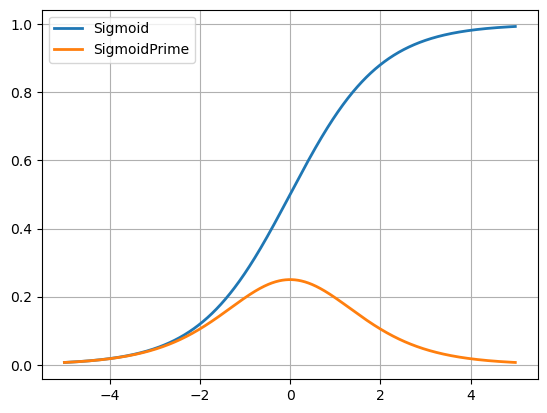

In [350]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])


In [351]:
NN=Neural_Network()

In [352]:
cost1=NN.costFunction(X,y)

In [353]:
cost1

array([0.04353107])

In [354]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [355]:
dJdW1

array([[-4.13917665e-03, -6.17362639e-05, -1.48645489e-02],
       [-1.81624927e-03, -2.52628726e-05, -6.55333165e-03]])

In [356]:
dJdW2

array([[-0.07207386],
       [-0.0594544 ],
       [-0.06262322]])

In [357]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.04353107] [0.05797018]


In [358]:
scalar=0.1
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.05797018] [0.05638828]


**First Problem**

[0.00180736]


array([[0.75476548],
       [0.8356943 ],
       [0.88185519]])

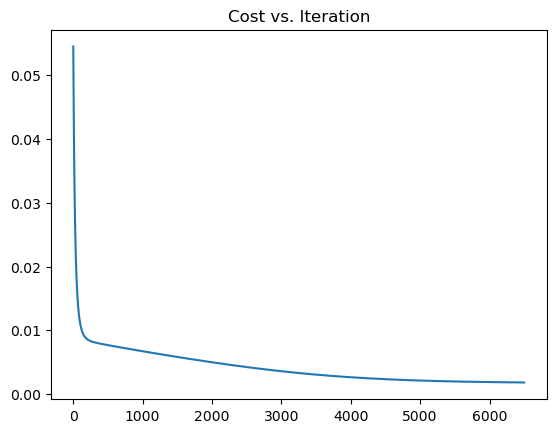

In [359]:
n_sigmoid = 6500
scalar_sigmoid = 2
Array_sigmoid = []
x_sigmoid = np.arange(0, n_sigmoid)

start_time_sigmoid = time.time()

for i in range(n_sigmoid):
    dJdW1,dJdW2=NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1-scalar*dJdW1
    NN.W2 = NN.W2-scalar*dJdW2
    cost = NN.costFunction(X,y)
    Array_sigmoid.append(cost)
print (cost)

end_time_sigmoid = time.time()
execution_time_sigmoid = end_time_sigmoid - start_time_sigmoid


plt.plot(x_sigmoid, Array_sigmoid)
plt.title('Cost vs. Iteration')

yhat=NN.forward(X)
yhat

**Second Problem: ReLU Activation Function**

In [360]:
NNR = Neural_Network()

[2.2609275e-05]


array([[0.75064495],
       [0.79393778],
       [0.93283761]])

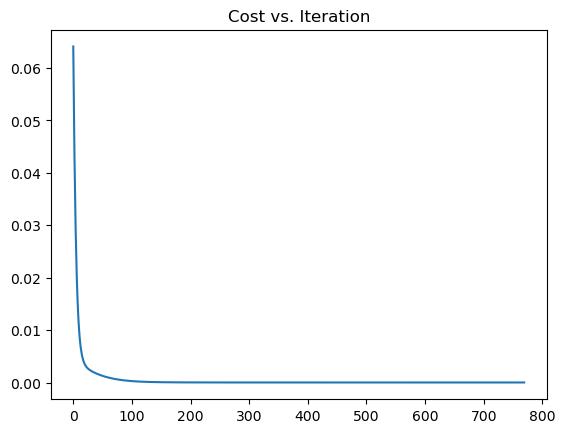

In [361]:
n_relu =770
scalar_relu = 0.1
Array_relu = []
x_relu = np.arange(0, n_relu)


start_time_relu = time.time()


for i in range(n_relu):
    dJdW1,dJdW2 = NNR.reluCostFunctionPrime(X,y)
    NNR.W1 = NNR.W1-scalar*dJdW1
    NNR.W2 = NNR.W2-scalar*dJdW2
    cost = NNR.reluCostFunction(X,y)
    Array_relu.append(cost)
print (cost)


end_time_relu = time.time()
execution_time_relu = end_time_relu - start_time_relu

plt.plot(x_relu, Array_relu)
plt.title('Cost vs. Iteration')

yHat1 = NNR.reluForward(X)
yHat1

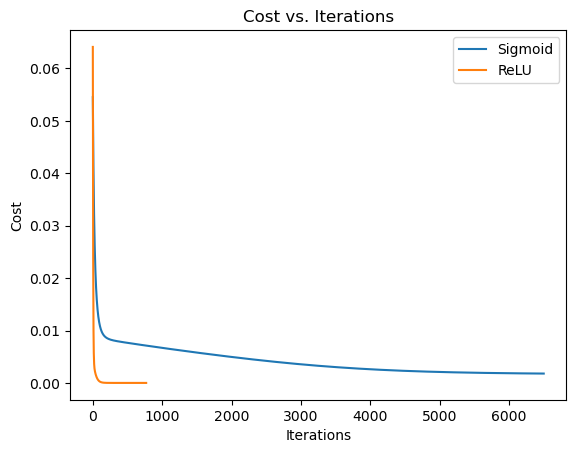

In [362]:
plt.plot(x_sigmoid, Array_sigmoid, label ='Sigmoid')
plt.plot(x_relu, Array_relu, label = "ReLU")
plt.xlabel ('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.legend()
plt.show()

**Second Problem: Comparing the speed of ReLU and Sigmoid neural networks**

In [363]:
print(f"Sigmoid execution time: {execution_time_sigmoid} seconds")
print(f"ReLU execution time: {execution_time_relu} seconds")

Sigmoid execution time: 0.3528578281402588 seconds
ReLU execution time: 0.03914833068847656 seconds


Compared to neural network that works with Sigmoid the one that works with ReLU is faster by around 9 times based on the execution time. 

**Third Problem: Similarity between the topological spaces**

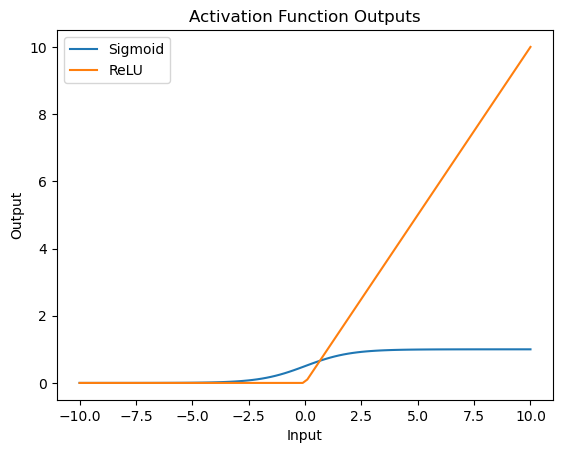

In [364]:
class ActivationFunctions:
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def relu(self, z):
        return np.maximum(0, z)

af = ActivationFunctions()

x_range = np.linspace(-10, 10, 100)

sigmoid_output = af.sigmoid(x_range)
relu_output = af.relu(x_range)

plt.plot(x_range, sigmoid_output,  label = "Sigmoid")
plt.plot(x_range, relu_output, label = "ReLU")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Activation Function Outputs")
plt.legend()
plt.show()

In order to compare the similarities between ReLU and Sigmoid functions, we decided to visualize the outputs of Activation Functions. According to out graph first similarity is in boundedness. Both functions are bounded, which means their outputs are constrainted within specific ranges. Another similarity we have found is in non-linearity of both functions. This allows neural networks to model complex relationships between inputs and outputs. Other distinct characteristics of these functions include shape, sparsity and smoothness. 

**Second Problem: Adding new hidden layers**

In [365]:
class New_Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=8
        self.newhiddenLayerSize = 4
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.newhiddenLayerSize)
        self.W3 = np.random.rand(self.newhiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z1 = np.dot (X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W3)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW3 = np.dot(self.a2.T, delta3)
        delta2 = np.dot(delta3, self.W3.T) * self.reluPrime(self.z2)
        dJdW2 = np.dot(self.a1.T, delta2)
        delta1 = np.dot(delta2, self.W2.T) * self.reluPrime(self.z1)
        dJdW1 = np.dot(X.T, delta1)
        return dJdW1, dJdW2, dJdW3

[1.82985513e-05]


array([[0.75034859],
       [0.79621697],
       [0.9347079 ]])

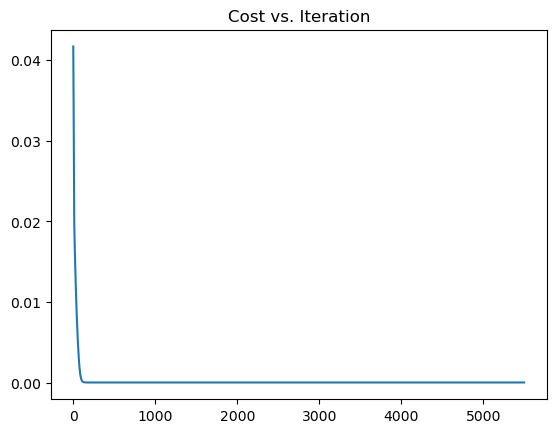

In [366]:
NNN = New_Neural_Network()

n = 5500
scalar = 1.1
Array = []
x = np.arange(0, n)

for i in range(n):
    dJdW1,dJdW2, dJdW3 = NNN.costFunctionPrime(X,y)
    NNN.W1 = NNN.W1-scalar*dJdW1
    NNN.W2 = NNN.W2-scalar*dJdW2
    NNN.W3 = NNN.W3 - scalar * dJdW3
    cost1 = NNN.costFunction(X,y)
    Array.append(cost1)
print (cost1)

plt.plot(x, Array)
plt.title('Cost vs. Iteration')

yhat2 = NNN.forward(X)
yhat2
    

**Second Problem: increasing the number of hidden later to 10**

In [367]:
class Unit_Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=8
        self.newhiddenLayerSize = 10
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.newhiddenLayerSize)
        self.W3 = np.random.rand(self.newhiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z1 = np.dot (X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W3)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW3 = np.dot(self.a2.T, delta3)
        delta2 = np.dot(delta3, self.W3.T) * self.reluPrime(self.z2)
        dJdW2 = np.dot(self.a1.T, delta2)
        delta1 = np.dot(delta2, self.W2.T) * self.reluPrime(self.z1)
        dJdW1 = np.dot(X.T, delta1)
        return dJdW1, dJdW2, dJdW3

[1.82985513e-05]


array([[0.75034859],
       [0.79621697],
       [0.9347079 ]])

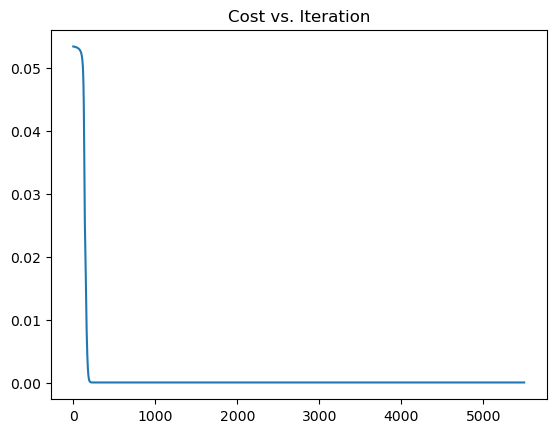

In [368]:
UNN = Unit_Neural_Network()

n = 5500
scalar = 1.1
Array = []
x = np.arange(0, n)

for i in range(n):
    dJdW1,dJdW2, dJdW3 = UNN.costFunctionPrime(X,y)
    UNN.W1 = UNN.W1-scalar*dJdW1
    UNN.W2 = UNN.W2-scalar*dJdW2
    UNN.W3 = UNN.W3 - scalar * dJdW3
    cost1 = UNN.costFunction(X,y)
    Array.append(cost1)
print (cost1)

plt.plot(x, Array)
plt.title('Cost vs. Iteration')

yhat2 = UNN.forward(X)
yhat2
    